In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [25]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle bool']

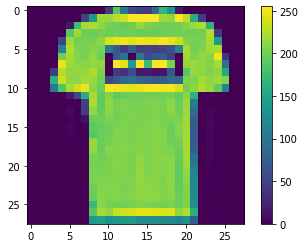

In [14]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 446us/step - loss: 0.6352 - accuracy: 0.7798
Epoch 2/10
1875/1875 [==============================] - 1s 438us/step - loss: 0.3853 - accuracy: 0.8616
Epoch 3/10
1875/1875 [==============================] - 1s 441us/step - loss: 0.3402 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 1s 438us/step - loss: 0.3157 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 1s 448us/step - loss: 0.2975 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 1s 443us/step - loss: 0.2825 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 1s 442us/step - loss: 0.2716 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 1s 445us/step - loss: 0.2580 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 1s 441us/step - loss: 0.2480 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 1s 445u

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test Accuracu: ', test_acc)
print('Test Loss: ', test_loss)

313/313 [==============================] - 0s 295us/step - loss: 0.3424 - accuracy: 0.8808
Test Accuracu:  0.8808000087738037
Test Loss:  0.34240487217903137


In [23]:
predictions = model.predict(test_images)

In [26]:
predictions[0]

array([7.8827907e-07, 4.2028298e-10, 1.6133857e-08, 1.9391827e-11,
       2.7229231e-11, 1.0043943e-03, 9.9426822e-09, 5.7793991e-04,
       5.6761262e-09, 9.9841690e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [31]:
test_labels[0]

9

### Verifying Predictions

Pick a number: 8


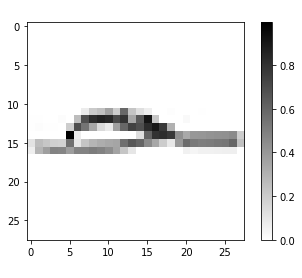

In [34]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
